In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("MachineLearning_sentiment.csv")

In [3]:
df.head(5)

,title,selftext,score,num_comments,created,author,vader_compound,vader_positive,vader_negative,vader_neutral,textblob_polarity,textblob_subjectivity
0,[D] Honest question: Does the world need anoth...,"Hello everyone,\n\nI spent an eternity trying ...",0,0,1.756355e+09,Only_Personality_998,0.8299,0.096,0.052,0.852,0.010048,0.453952
1,[N] Unprecedented number of submissions at AAA...,And 20K out of 29K submissions are from China ...,78,22,1.756337e+09,Adventurous-Cut-7077,0.4125,0.124,0.046,0.831,0.100000,0.456667
2,[P] jupytercad-mcp: MCP server for JupyterCAD ...,Demo: https://github.com/user-attachments/asse...,2,0,1.756332e+09,Material_Pool_986,0.0000,0.000,0.000,1.000,0.000000,0.000000
3,Arxiv submission on hold [R],Hey \nLooking for information online about the...,0,1,1.756329e+09,OkOwl6744,0.3946,0.106,0.085,0.809,0.106000,0.514111
4,[D] Anyone successfully running LLMs fully on ...,Has anyone managed to get near-full ANE utiliz...,3,4,1.756320e+09,AlanzhuLy,0.5439,0.078,0.065,0.857,0.371577,0.640030


In [4]:
df.isnull().sum()

title                     0
selftext                 30
score                     0
num_comments              0
created                   0
author                   10
vader_compound            0
vader_positive            0
vader_negative            0
vader_neutral             0
textblob_polarity         0
textblob_subjectivity     0
dtype: int64

In [5]:
df['selftext'] = df['selftext'].fillna('')

In [6]:
df['created'] = pd.to_datetime(df['created'], unit='s')

In [7]:
df = df.drop_duplicates(subset=['title', 'selftext'])


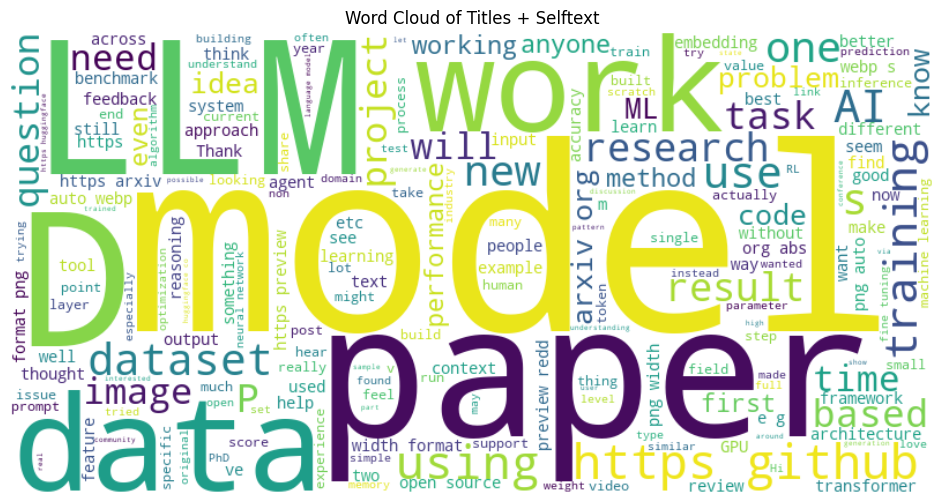

In [10]:
# Handle missing text
df['selftext'] = df['selftext'].fillna('')

# Combine title + selftext
text_data = " ".join(df['title'].astype(str) + " " + df['selftext'].astype(str))
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)

# Plot it
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Titles + Selftext")
plt.show()

In [11]:
# Save cleaned dataset to a new CSV file
df.to_csv("MachineLearning_sentiment_cleaned.csv", index=False)

In [12]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
df = pd.read_csv("MachineLearning_sentiment_cleaned.csv")

# Combine title and selftext
df["text"] = df["title"].astype(str) + " " + df["selftext"].astype(str)


In [14]:
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # lowercase + tokenize

    # Remove stopwords and non-alphabetic tokens
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]

    # Lemmatization with spaCy
    doc = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc]

    return " ".join(lemmas)


In [15]:
df["clean_text"] = df["text"].apply(preprocess_text)


In [16]:
print(df[["title", "clean_text"]].head())

                                               title  \
0  [D] Honest question: Does the world need anoth...   
1  [N] Unprecedented number of submissions at AAA...   
2  [P] jupytercad-mcp: MCP server for JupyterCAD ...   
3                      Arxiv submission on hold  [R]   
4  [D] Anyone successfully running LLMs fully on ...   

                                          clean_text  
0  honest question world need another productivit...  
1  n unprecedented number submission aaai submiss...  
2  p mcp server jupytercad control use language d...  
3  arxiv submission hold r hey look information o...  
4  anyone successfully run llm fully apple neural...  
